Decision Tree Accuracy: 0.6666666666666666
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.43      0.46      0.44        13
           2       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45



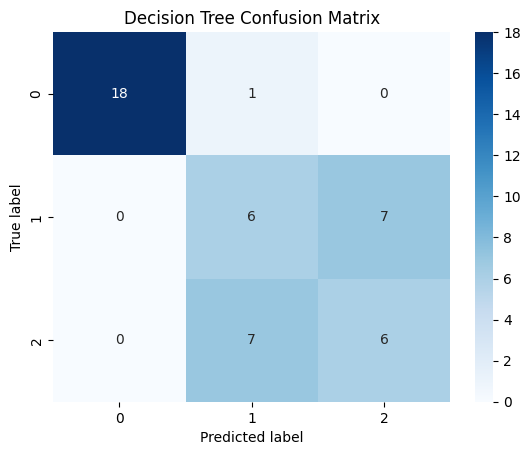

C:\Users\rkmau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


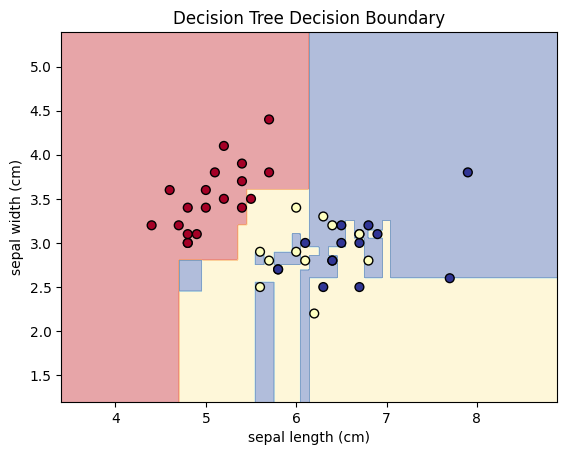

Random Forest Accuracy: 0.7555555555555555
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



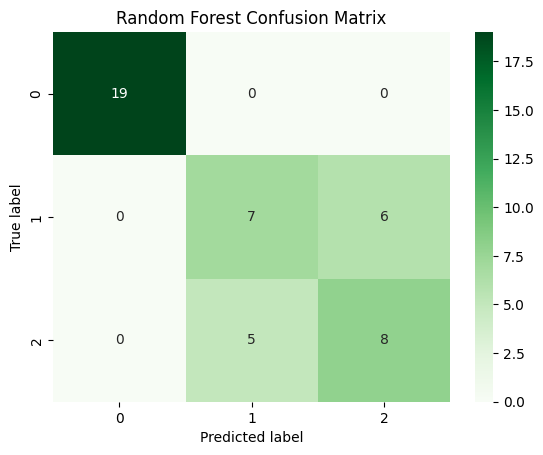

C:\Users\rkmau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


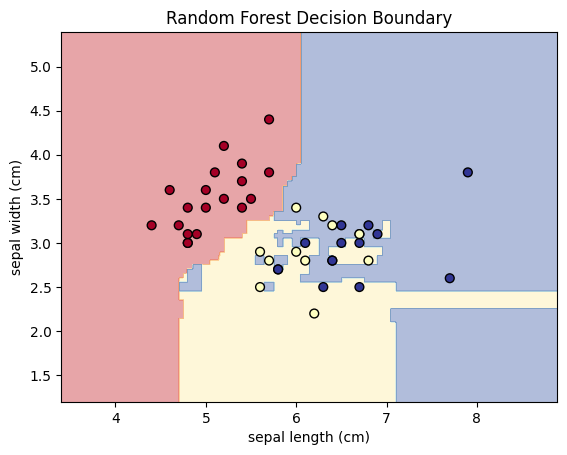

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset and choose only two features for visualization (we'll use the first two)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names).iloc[:, :2]  # Only first two features
y = pd.DataFrame(iris.target, columns=['species'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    # Create a meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the entire grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values.ravel(), s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions with Decision Tree
dt_predictions = dt_model.predict(X_test)

# Decision Tree Accuracy and Confusion Matrix
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Plot Confusion Matrix for Decision Tree
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot Decision Boundary for Decision Tree
plot_decision_boundary(dt_model, X_test, y_test, "Decision Tree Decision Boundary")

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions with Random Forest
rf_predictions = rf_model.predict(X_test)

# Random Forest Accuracy and Confusion Matrix
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot Confusion Matrix for Random Forest
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot Decision Boundary for Random Forest
plot_decision_boundary(rf_model, X_test, y_test, "Random Forest Decision Boundary")
